### LangGraph with sequential flow

In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph

class AgentState(TypedDict):
    name: str
    age: int
    skills: list[str]
    result: str

In [3]:

def greeting_node(state: AgentState):
    state["result"] = f"{state['name']}, Welcome to the system! "
    return state

def age_node(state: AgentState):
    state["result"] += f"You are {state['age']} years old! "
    return state

def skills_node(state: AgentState):
    skills = ', '.join(state['skills'])
    state["result"] += f"You have the following skills: {skills}. "
    return state

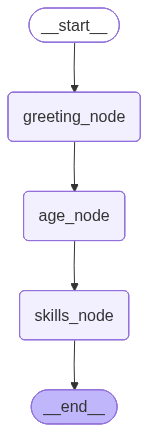

In [7]:
graph = StateGraph(AgentState)
graph.add_node("greeting_node", greeting_node)
graph.add_node("age_node", age_node)
graph.add_node("skills_node", skills_node)
graph.add_edge("greeting_node", "age_node")
graph.add_edge("age_node", "skills_node")
graph.set_entry_point("greeting_node")
graph.set_finish_point("skills_node")
app = graph.compile()
app

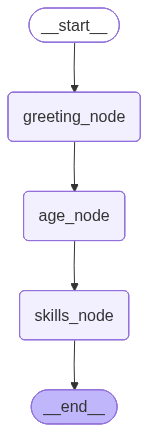

In [8]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))  # type: ignore

In [10]:
result = app.invoke({"name": "kirean", "age": 32, "skills": ["Python", "JavaScript"]})
result["result"]

'kirean, Welcome to the system! You are 32 years old! You have the following skills: Python, JavaScript. '